1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from scipy.integrate import trapz

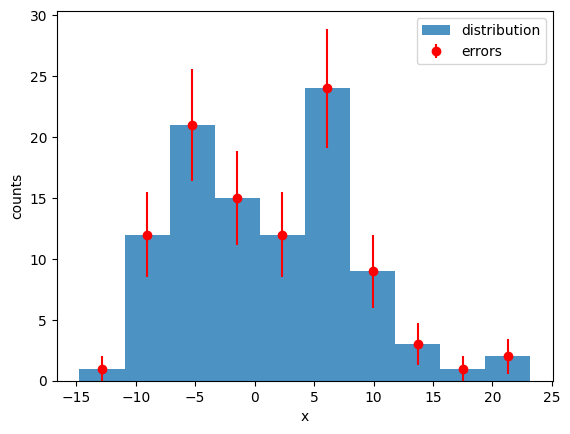

In [8]:
x = np.random.normal(loc=1.5, scale=7, size=(100,))

counts, bins = np.histogram(x, bins=int(np.sqrt(100)))

err = np.sqrt(counts)
bin_centers = (bins[:-1]+bins[1:])/2

plt.hist(x, bins=bins, alpha=0.8, label='distribution')
plt.errorbar(bin_centers, counts, yerr=err, fmt='o', label='errors', color='red')
plt.yticks(np.arange(0, (np.max(counts)+np.max(err))+3, 5))
plt.xlabel('x')
plt.ylabel('counts')
plt.legend()
plt.show()

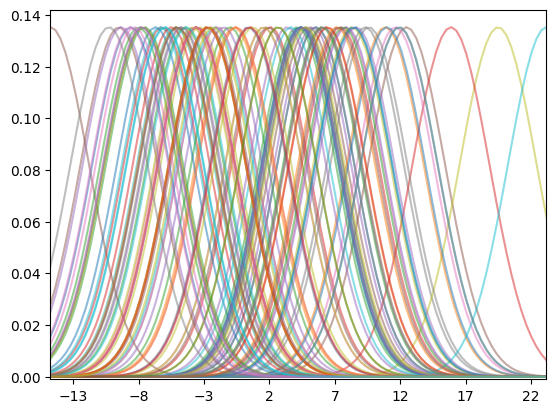

In [13]:
means = x
std = 1.06*x.std()*x.size**(-1/5.)
t = np.linspace(x.min(), x.max(), 100)
gaussians = stats.norm.pdf(t[:,None], loc=means, scale=std).T # add a new axis to t -> passing a (300, 1) array

for gaussian in gaussians:
    plt.plot(t, gaussian, alpha=0.5)

plt.xlim(x.min(), x.max())
plt.xticks(np.arange(int(x.min())+1, int(x.max())+3, 5))
plt.ylim(-0.001)
plt.show()

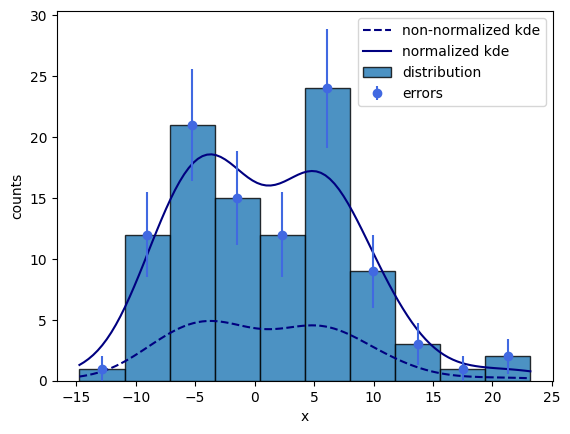

In [30]:
g_sum = np.sum(gaussians, axis=0)
hist_area = trapz(counts, bin_centers)
g_area = trapz(g_sum, t)

A = hist_area/g_area

plt.plot(t, g_sum, '--', label='non-normalized kde', color='navy')
plt.plot(t, g_sum*A, label='normalized kde', color='navy')
plt.hist(x, bins=bins, alpha=0.8, label='distribution', color='tab:blue', edgecolor='black')
plt.errorbar(bin_centers, counts, yerr=err, fmt='o', label='errors', color='royalblue')
plt.yticks(np.arange(0, (np.max(counts)+np.max(err))+3, 5))
plt.xlabel('x')
plt.ylabel('counts')
plt.legend()
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

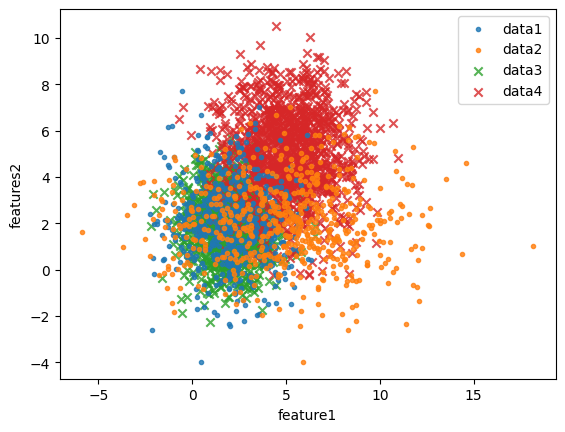

In [41]:
def data_gen(mean1, mean2, std1, std2, N):
    data1 = np.random.normal(loc=mean1, scale=std1, size=(2,N))
    data2 = np.random.normal(loc=mean2, scale=std2, size=(2,N))
    return data1, data2

def data_gen_multi(mean1, mean2, cov1, cov2, N):
    data1 = np.random.multivariate_normal(mean=mean1, cov=cov1, size=(2,N))
    data2 = np.random.multivariate_normal(mean=mean2, cov=cov2, size=(2,N))
    return data1, data2

data1, data2 = data_gen(2, 5, 1.7, 3.3, 600)

mean1 = [2, 2]
mean2 = [5, 5]
cov1 = np.diag([1.7, 1.7])
cov2 = np.diag([3.3, 3.3])
data3, data4 = data_gen_multi(mean1, mean2, cov1, cov2, N=600)

plt.scatter(data1[0,:], data1[1,:], label='data1', marker='.', alpha=0.8, zorder=100)
plt.scatter(data2[0,:], data1[1,:], label='data2', marker='.', alpha=0.8, zorder=100)
plt.scatter(data3[0,:], data3[1,:], label='data3', marker='x', alpha=0.8)
plt.scatter(data4[0,:], data4[1,:], label='data4', marker='x', alpha=0.8)
plt.xlabel('feature1')
plt.ylabel('features2')
plt.legend()
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

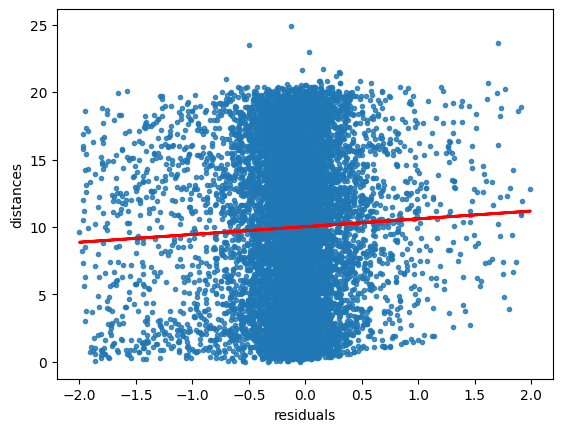

In [51]:
data = np.load('./residuals_261.npy', allow_pickle=True)

df = pd.DataFrame(data.item())

df_clean = df[np.abs(df['residuals']) < 2]

lin_regr = stats.linregress(df_clean.residuals, df_clean.distances)

plt.scatter(df_clean.residuals, df_clean.distances, marker='.', alpha=0.8)
plt.plot(df_clean.residuals, lin_regr.intercept + lin_regr.slope*df_clean.residuals, 'r-', zorder=100, linewidth=2)
plt.xlabel('residuals')
plt.ylabel('distances')
plt.show()

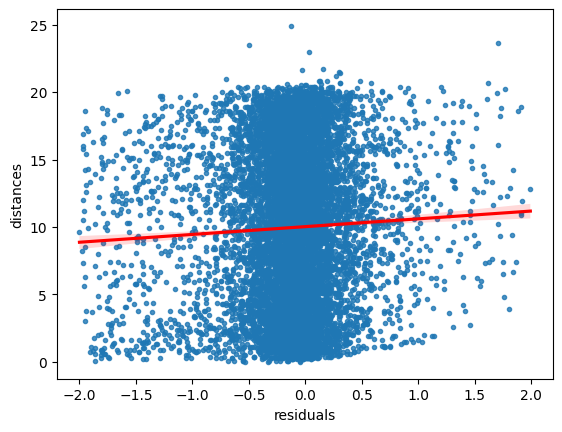

In [55]:
sns.regplot(df_clean, x='residuals', y='distances', marker='.', line_kws={'zorder': 100, 'color':'red'})
plt.show()

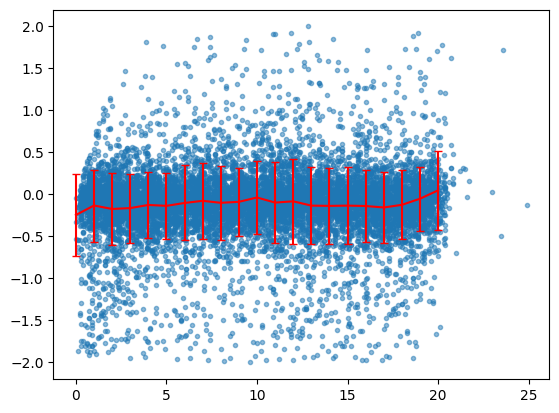

In [71]:
# Fill 3 numpy arrays
#   * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
#   * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
#   * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
# * Plot the profile plot on top of the scatter plot

x = np.linspace(0, 20, 21)

y = np.zeros_like(x)
erry = np.zeros_like(x)
for i in x:
    y[int(i)] = np.mean(df_clean[(df_clean['distances']>=i) & ( df_clean['distances']< i+1)]['residuals'])
    erry[int(i)] = np.std(df_clean[(df_clean['distances']>=i) & ( df_clean['distances']< i+1)]['residuals'])

plt.errorbar(x, y, erry, color='r', capsize=3, fmt='-')
plt.scatter(df_clean['distances'], df_clean['residuals'], marker='.', alpha=0.5)
plt.show()